In [1]:
import numpy as np
import pandas as pd
#@formatter:off
%matplotlib inline
#@formatter:on
import matplotlib.pyplot as plt
import seaborn

seaborn.set()

### 1 Average president height

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185] 

Mean height:  179.73809523809524
Standard deviation:  6.931843442745892
Minimum height:  163
Maximum height:  193 

25th percentile:  174.25
Median:  182.0
75th percentile:  183.0 



Text(0, 0.5, 'number')

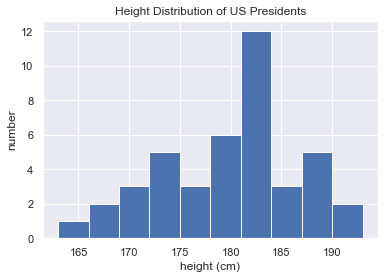

In [2]:
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights, '\n')

print("Mean height: ", heights.mean())
print("Standard deviation: ", heights.std())
print("Minimum height: ", heights.min())
print("Maximum height: ", heights.max(), '\n')

print("25th percentile: ", np.percentile(heights, 25))
print("Median: ", np.median(heights))
print("75th percentile: ", np.percentile(heights, 75), '\n')

plt.hist(heights)
plt.title('Height Distribution of US Presidents')  # Распределение роста президентов США
plt.xlabel('height (cm)')  # Рост, см
plt.ylabel('number')  # Количество

### 2 Count rainy days

(365,) 

Number days without rain:  215
Number days with rain:  150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches : 75 

Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


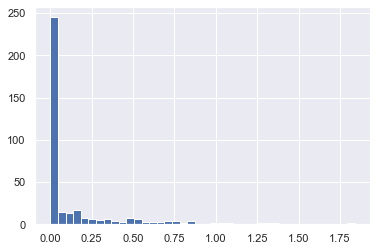

In [3]:
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254
print(inches.shape, '\n')

plt.hist(inches, 40)

print("Number days without rain: ", np.sum(inches == 0).sum())
print("Number days with rain: ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches :", np.sum((inches > 0) & (inches < 0.2)), '\n')

# создаем маску для всех дождливых дней
rainy = inches > 0
# создаем маску для всех летних дней (21 июня1 – 172-й день)
summer = (np.arange(365) >= 171) & (np.arange(365) < 171 + 92)
print("Median precip on rainy days in 2014 (inches): ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):", np.median(inches[rainy & ~summer]))

### 3 Random points choosing

(100, 2)
(20, 2)


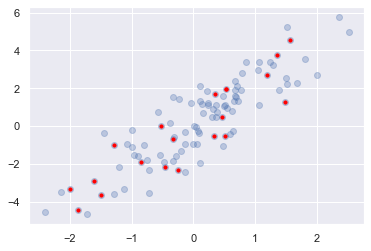

In [4]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = np.random.multivariate_normal(mean, cov, 100)
print(X.shape)

indices = np.random.randint(100, size=20)
selection = X[indices]  # Тут используется «прихотливая» индексация
print(selection.shape)

plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='red', s=10);

### 4 Splitting data into intervals

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189  0.35711257  1

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 [<matplotlib.patches.Polygon at 0x1f8dc7cfe50>])

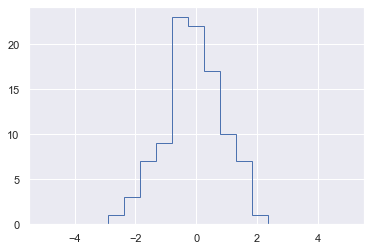

In [5]:
np.random.seed(42)
x = np.random.randn(100)
print(x)
# Рассчитываем гистограмму вручную
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)
# Ищем подходящий интервал для каждого x
indices = np.searchsorted(bins, x)
# Добавляем 1 к каждому из интервалов
np.add.at(counts, indices, 1)

# Визуализируем результаты
# plt.step(x=bins, y=counts)
#or
plt.hist(x=x, bins=bins, histtype='step')

### 5 K-means

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


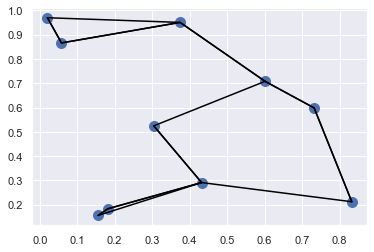

In [6]:
np.random.seed(42)
X = np.random.rand(10, 2)
K = 2

dist_sq = np.sum((X[np.newaxis, :] - X[:, np.newaxis]) ** 2, axis=2)
print(dist_sq.diagonal())

nearest = np.argsort(dist_sq, axis=1)
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

plt.scatter(X[:, 0], X[:, 1], s=100)
# Рисуем линии из каждой точки к ее двум ближайшим соседям
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K + 1]:
        # чертим линию от X[i] до X[j]
        # Используем для этого «магическую» функцию zip:
        plt.plot(*zip(X[j], X[i]), color='black')